In [1]:
import os

# 1. Define your main directory path
base_path = r"C:\Users\Alire\Desktop\Comparision ML"

# 2. Define the subfolders you want to create
# You mentioned "train", so I included that, plus standard ML folders.
folders = [
    "Data",           # For your source files
    "Data/Train",     # Training data (based on your request)
    "Data/Test",      # Testing data
    "Data/Validation",# Validation data
    "Models",         # To save trained models
    "Notebooks",      # For your Jupyter notebooks/scripts
    "Results"         # For graphs and outputs
]

# 3. Create the folders
try:
    # Create the base directory if it doesn't exist
    if not os.path.exists(base_path):
        os.makedirs(base_path)
        print(f"Created base directory: {base_path}")
    else:
        print(f"Base directory already exists: {base_path}")

    # Create subfolders
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
            print(f"Created: {folder_path}")
        else:
            print(f"Already exists: {folder_path}")
            
    print("\nSUCCESS: Folder structure is ready!")

except Exception as e:
    print(f"An error occurred: {e}")

Base directory already exists: C:\Users\Alire\Desktop\Comparision ML
Already exists: C:\Users\Alire\Desktop\Comparision ML\Data
Created: C:\Users\Alire\Desktop\Comparision ML\Data/Train
Created: C:\Users\Alire\Desktop\Comparision ML\Data/Test
Created: C:\Users\Alire\Desktop\Comparision ML\Data/Validation
Created: C:\Users\Alire\Desktop\Comparision ML\Models
Created: C:\Users\Alire\Desktop\Comparision ML\Notebooks
Created: C:\Users\Alire\Desktop\Comparision ML\Results

SUCCESS: Folder structure is ready!


In [4]:
import pandas as pd
import os

# ---------------------------------------------------------
# CONFIGURATION
# ---------------------------------------------------------
base_dir = r"C:\Users\Alire\Desktop\Comparision ML"

# Updated filenames to match your actual files
file1_name = "extended_complete_Historical_5000_clean.csv"
file2_name = "mid_future_with_preds_clean.csv"

path1 = os.path.join(base_dir, file1_name)
path2 = os.path.join(base_dir, file2_name)

# ---------------------------------------------------------
# EXECUTION
# ---------------------------------------------------------
try:
    # Loading data
    df1 = pd.read_csv(path1, encoding="latin1")
    df2 = pd.read_csv(path2, encoding="latin1")

    print("FILE 1 COLUMNS (Historical):")
    print(df1.columns)
    print(f"Shape: {df1.shape}")

    print("\nFILE 2 COLUMNS (Future):")
    print(df2.columns)
    print(f"Shape: {df2.shape}")
    
    # Quick consistency check
    missing_in_future = set(df1.columns) - set(df2.columns)
    missing_in_hist = set(df2.columns) - set(df1.columns)
    
    if missing_in_future:
        print(f"\n[!] Columns in Hist but NOT in Future: {missing_in_future}")
    if missing_in_hist:
        print(f"\n[!] Columns in Future but NOT in Hist: {missing_in_hist}")

except FileNotFoundError as e:
    print(f"Error: Could not find file. Please check path: {e}")

FILE 1 COLUMNS (Historical):
Index(['Cooling_SP', 'Wall_U', 'Window_U ', 'Floor_U', 'Roof_U', 'Window_SHGC',
       'Infiltration_rate ', 'Sensible HR_Eff', 'EUI-Baseline', 'IDD-Baseline',
       'OCI-Baseline'],
      dtype='object')
Shape: (5000, 11)

FILE 2 COLUMNS (Future):
Index(['Cooling_SP', 'Wall_U', 'Window_U ', 'Floor_U', 'Roof_U', 'Window_SHGC',
       'Infiltration_rate ', 'Sensible HR_Eff', 'EUI-Mid-future',
       'IDD-Mid-future', 'OCI-Mid-future'],
      dtype='object')
Shape: (5000, 11)

[!] Columns in Hist but NOT in Future: {'OCI-Baseline', 'IDD-Baseline', 'EUI-Baseline'}

[!] Columns in Future but NOT in Hist: {'OCI-Mid-future', 'EUI-Mid-future', 'IDD-Mid-future'}


Success! Framed plots saved to Desktop as PNG and SVG.


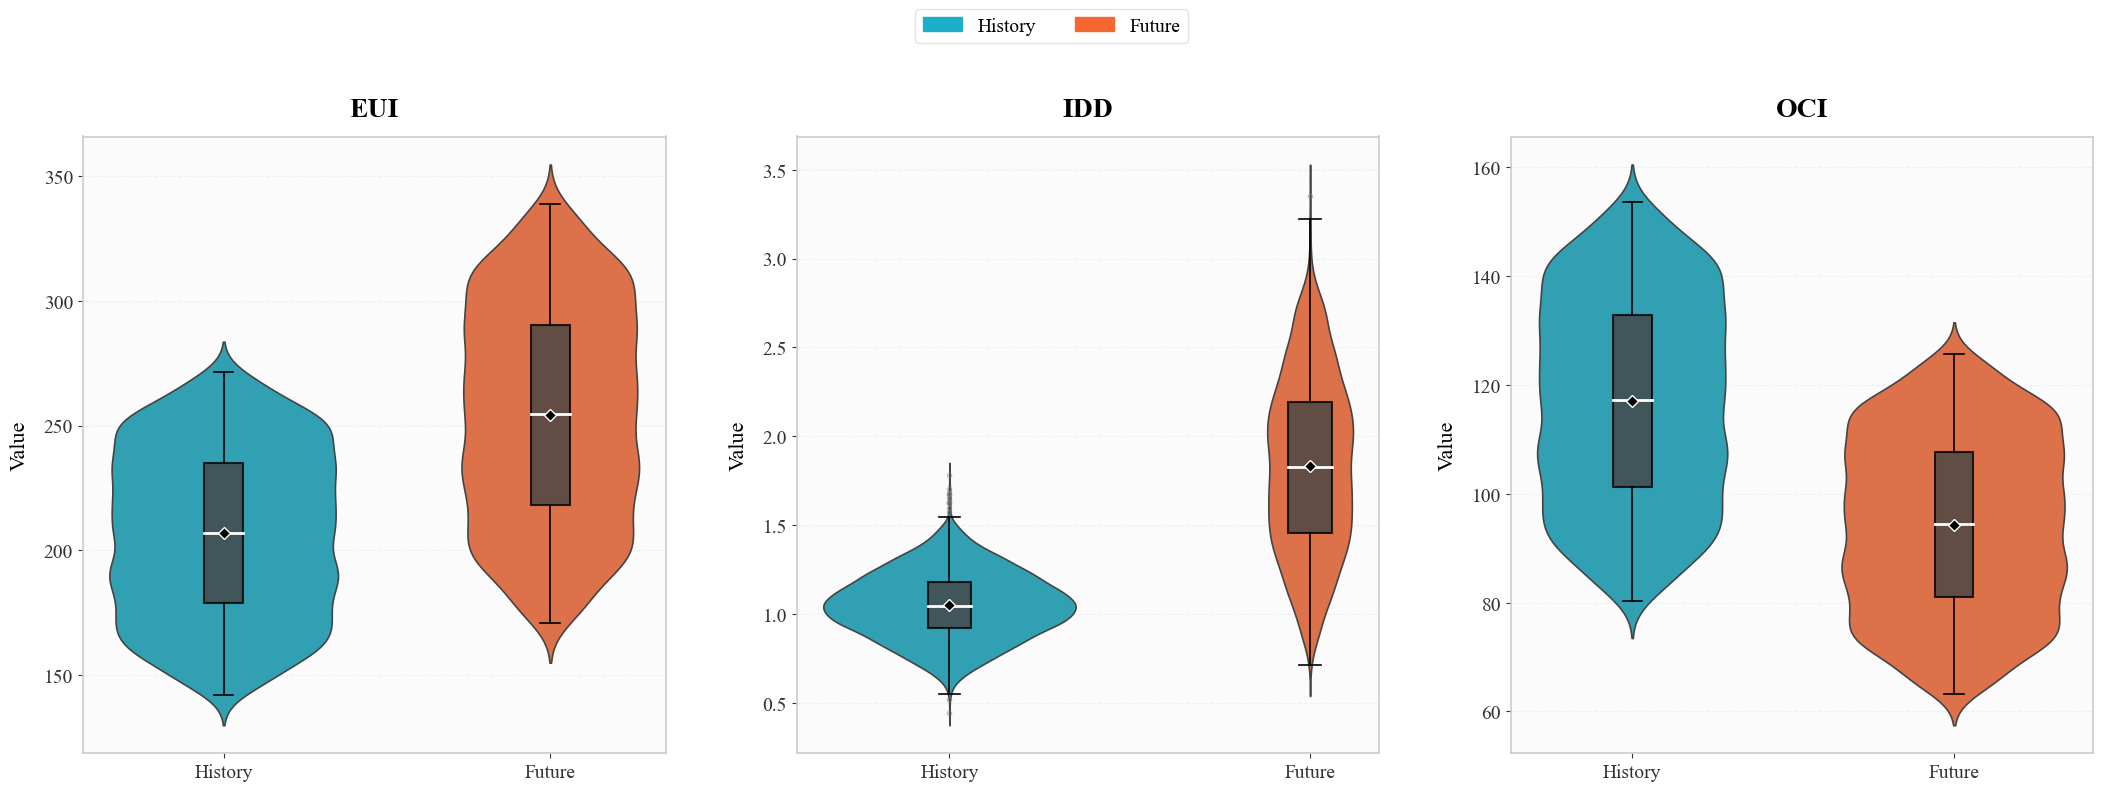

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. STYLE CONFIGURATION (Professional Serif)
# ==========================================
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'axes.linewidth': 1.2, # Thin, elegant lines
    'svg.fonttype': 'none'
})

# ==========================================
# 2. DATA LOADING & PREPARATION
# ==========================================
base_path = r"C:\Users\Alire\Desktop\Comparision ML"
train_file = os.path.join(base_path, "extended_complete_Historical_5000_clean.csv")
test_file  = os.path.join(base_path, "mid_future_with_preds_clean.csv")

# Note: Ensure these files exist or wrap in try-except if testing
df_hist = pd.read_csv(train_file, encoding='latin1')
df_fut  = pd.read_csv(test_file, encoding='latin1')

df_hist.rename(columns={'EUI-Baseline': 'EUI', 'IDD-Baseline': 'IDD', 'OCI-Baseline': 'OCI'}, inplace=True)
df_fut.rename(columns={'EUI-Mid-future': 'EUI', 'IDD-Mid-future': 'IDD', 'OCI-Mid-future': 'OCI'}, inplace=True)

df_hist['Dataset'] = 'History'
df_fut['Dataset'] = 'Future'
df = pd.concat([df_hist, df_fut], ignore_index=True)

# ==========================================
# 3. PLOTTING (Violin + Box + Minimal Frame)
# ==========================================
targets = ['EUI', 'IDD', 'OCI']
palette = {"History": "#1CB0C8", "Future": "#F56631"}

fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.patch.set_facecolor('#FFFFFF') # Clean white figure background

for ax, target in zip(axes, targets):
    # --- ADDING THE MINIMAL BOX/FRAME ---
    # 1. Set a very subtle background for the plot area itself
    ax.set_facecolor('#FBFBFB') 
    
    # 2. Force all four borders (spines) to be visible and styled
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('#CCCCCC') # Light gray for a "minimalist" look
        spine.set_linewidth(1.2)

    # --- GRID & PLOT ELEMENTS ---
    ax.grid(axis='y', linestyle='--', alpha=0.4, color='#DDDDDD', zorder=0)
    ax.set_axisbelow(True)

    # Violin Layer
    sns.violinplot(
        data=df, x='Dataset', y=target, palette=palette,
        inner=None, width=0.7, linewidth=1.2, cut=2, bw_adjust=0.6, ax=ax,
        zorder=2
    )

    # Boxplot Layer
    for i, group in enumerate(['History', 'Future']):
        data_subset = df[df['Dataset'] == group][target].dropna()
        ax.boxplot(
            data_subset, positions=[i], widths=0.12, patch_artist=True,
            showmeans=True, manage_ticks=False,
            boxprops=dict(facecolor='#444444', color='black', linewidth=1.5, alpha=0.8, zorder=3),
            medianprops=dict(color='white', linewidth=2, zorder=5),
            meanprops=dict(marker='D', markerfacecolor='black', markeredgecolor='white', markersize=6, zorder=6),
            whiskerprops=dict(color='black', linewidth=1.2, zorder=3),
            capprops=dict(color='black', linewidth=1.2, zorder=3),
            flierprops=dict(marker='o', markersize=3, markerfacecolor='none', markeredgecolor='gray', alpha=0.5, zorder=3)
        )

    # Polish Titles and Labels
    ax.set_title(target, fontweight='bold', pad=15, fontsize=20)
    ax.set_xlabel("")
    ax.set_ylabel("Value", labelpad=10)
    
    # Optional: Slightly dim the tick labels for a modern look
    ax.tick_params(axis='both', colors='#333333')

# Global Legend
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[k]) for k in palette]
fig.legend(handles, palette.keys(), loc='upper center', ncol=2, 
           frameon=True, facecolor='white', edgecolor='#DDDDDD', 
           bbox_to_anchor=(0.5, 1.05))

plt.tight_layout(pad=3.0)

# ==========================================
# 4. SAVE TO DESKTOP
# ==========================================
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
save_path_png = os.path.join(desktop_path, "Professional_Boxed_Violin.png")
save_path_svg = os.path.join(desktop_path, "Professional_Boxed_Violin.svg")

plt.savefig(save_path_png, dpi=300, bbox_inches='tight')
plt.savefig(save_path_svg, bbox_inches='tight')

print(f"Success! Framed plots saved to Desktop as PNG and SVG.")
plt.show()

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# =====================================================
# 1. CONFIGURATION
# =====================================================
base_path = r"C:\Users\Alire\Desktop\Comparision ML"
results_path = os.path.join(base_path, "Results_Script1_Visual_Final_Merged_Classic")
os.makedirs(results_path, exist_ok=True)

files = {
    "Historical Data": os.path.join(base_path, "extended_complete_Historical_5000_clean.csv"),
    "Mid-Future Data": os.path.join(base_path, "mid_future_with_preds_clean.csv")
}

target_names = ['EUI', 'IDD', 'OCI']
SENSOR_NOISE_LEVEL = 0.12
XGBOOST_FEATURE_NOISE = 0.05

feature_cols = [
    'Cooling_SP', 'Wall_U', 'Window_U', 'Floor_U', 'Roof_U',
    'Window_SHGC', 'Infiltration_rate', 'Sensible HR_Eff'
]

# =====================================================
# 2. METRICS FUNCTION
# =====================================================
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mean_val = np.mean(y_true)
    cv_rmse = (rmse / mean_val * 100) if mean_val != 0 else 0
    return r2, mae, cv_rmse

# =====================================================
# 3. VISUALIZATION FUNCTION (RESTORED FORMAT)
# =====================================================
def plot_summary(dataset_name, target, plot_data):
    # Enforce Times New Roman
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    plt.rcParams.update({'font.size': 14})

    fig = plt.figure(figsize=(24, 18))
    grid = gridspec.GridSpec(2, 3, wspace=0.25, hspace=0.35)

    models = list(plot_data.keys())

    # Colors
    c_train = '#9b59b6'  # Purple
    c_test = '#2ecc71'   # Green

    for i, model_name in enumerate(models):
        data = plot_data[model_name]
        ytr, ytr_p = data['y_train_true'], data['y_train_pred']
        yte, yte_p = data['y_test_true'], data['y_test_pred']
        
        r2_tr, mae_tr, cv_tr = get_metrics(ytr, ytr_p)
        r2_te, mae_te, cv_te = get_metrics(yte, yte_p)

        inner = gridspec.GridSpecFromSubplotSpec(4, 4, subplot_spec=grid[i])
        ax_top = fig.add_subplot(inner[0, :])
        ax_main = fig.add_subplot(inner[1:, :])

        # =====================================================
        # HISTOGRAM SECTION (MERGED + CLASSIC STYLE)
        # =====================================================
        
        # 1. Merge True + Predicted
        train_combined = np.concatenate([ytr, ytr_p])
        test_combined = np.concatenate([yte, yte_p])

        # 2. Define bins
        all_vals_hist = np.concatenate([train_combined, test_combined])
        bins = np.linspace(all_vals_hist.min(), all_vals_hist.max(), 45)

        # 3. Plot TRAIN (Purple)
        # 'stepfilled' gives the solid shape you want.
        ax_top.hist(train_combined, bins=bins, density=True, alpha=0.5, color=c_train, 
                    histtype='stepfilled', label='Train (True + Pred)')

        # 4. Plot TEST (Green)
        # 'stepfilled' layered on top.
        ax_top.hist(test_combined, bins=bins, density=True, alpha=0.5, color=c_test, 
                    histtype='stepfilled', label='Test (True + Pred)')

        # Legend and cleanup
        ax_top.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6), ncol=2, fontsize=12, frameon=False)
        ax_top.axis("off")
        ax_top.set_title(model_name, fontsize=16, fontweight='bold', y=-0.15)

        # =====================================================
        # SCATTER PLOT SECTION
        # =====================================================
        ax_main.scatter(ytr, ytr_p, alpha=0.2, color=c_train, s=80, label='Train data')
        ax_main.scatter(yte, yte_p, alpha=0.45, color=c_test, s=80, edgecolor='white', linewidth=0.5, label='Test data')

        all_vals = np.concatenate([ytr, ytr_p, yte, yte_p])
        lo, hi = all_vals.min(), all_vals.max()
        pad = (hi - lo) * 0.05
        lo -= pad; hi += pad
        ax_main.plot([lo, hi], [lo, hi], 'k:', lw=3, label='Ideal fit (y=x)')

        if len(ytr) > 1:
            m_tr, b_tr = np.polyfit(ytr, ytr_p, 1)
            ax_main.plot([lo, hi], m_tr*np.array([lo, hi]) + b_tr, color=c_train, lw=3, label='Train trend')
        if len(yte) > 1:
            m_te, b_te = np.polyfit(yte, yte_p, 1)
            ax_main.plot([lo, hi], m_te*np.array([lo, hi]) + b_te, color=c_test, lw=3, ls='--', label='Test trend')

        stats_text = (
            f"TRAIN\nR² : {r2_tr:.3f}\nMAE: {mae_tr:.3f}\nCV-RMSE: {cv_tr:.1f}%\n"
            f"----------------\n"
            f"TEST\nR² : {r2_te:.3f}\nMAE: {mae_te:.3f}\nCV-RMSE: {cv_te:.1f}%"
        )
        props = dict(boxstyle='round', facecolor='white', alpha=0.95)
        ax_main.text(0.97, 0.03, stats_text, transform=ax_main.transAxes, ha='right', va='bottom', fontsize=11, bbox=props)

        handles, labels = ax_main.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        desired_order = ['Train data', 'Test data', 'Ideal fit (y=x)', 'Train trend', 'Test trend']
        ordered_handles = [by_label[l] for l in desired_order if l in by_label]
        ordered_labels = [l for l in desired_order if l in by_label]
        ax_main.legend(ordered_handles, ordered_labels, loc='upper left', fontsize=10, framealpha=0.95)
        
        ax_main.grid(True, linestyle=':', alpha=0.6)
        ax_main.set_xlabel("True Values", fontweight='bold')
        ax_main.set_ylabel("Predicted Values", fontweight='bold')

    fig.suptitle(f"{dataset_name} | {target} | Model Comparison", fontsize=24, fontweight='bold')

    fname_png = f"Summary_{dataset_name}_{target}.png"
    fname_svg = f"Summary_{dataset_name}_{target}.svg"
    plt.savefig(os.path.join(results_path, fname_png), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(results_path, fname_svg), bbox_inches='tight')

    plt.close()
    print(f"✅ Saved plots: {fname_png} & {fname_svg}")

# =====================================================
# 4. MAIN EXECUTION
# =====================================================
final_metrics = []

models = {
    "CatBoost Regressor": CatBoostRegressor(iterations=1000, depth=4, learning_rate=0.03, l2_leaf_reg=10, loss_function='RMSE', verbose=0, random_state=42),
    "Extreme Gradient Boosting (XGBoost)": XGBRegressor(n_estimators=1000, max_depth=4, learning_rate=0.03, random_state=42, verbosity=0),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regressor": SVR(kernel='rbf', C=10, epsilon=0.1)
}

for dataset_name, file_path in files.items():
    if not os.path.exists(file_path):
        print(f"⚠️ Warning: File not found: {file_path}")
        continue

    print(f"\nProcessing Dataset: {dataset_name}...")
    df = pd.read_csv(file_path, encoding='latin1')
    df.columns = df.columns.str.replace(u'\xa0', ' ').str.strip()
    
    df.rename(columns={
        'EUI-Baseline': 'EUI', 'EUI-Mid-future': 'EUI',
        'IDD-Baseline': 'IDD', 'IDD-Mid-future': 'IDD',
        'OCI-Baseline': 'OCI', 'OCI-Mid-future': 'OCI'
    }, inplace=True)

    X = df[feature_cols].values

    for target in target_names:
        if target not in df.columns:
            print(f"  Skipping target {target} (not found in columns)")
            continue
        
        print(f"  > Target: {target}")
        y_clean = df[target].values
        noise = np.random.normal(0, np.std(y_clean) * SENSOR_NOISE_LEVEL, len(y_clean))
        y = y_clean + noise
        
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
        
        scaler = StandardScaler()
        X_tr_s = scaler.fit_transform(X_tr)
        X_te_s = scaler.transform(X_te)
        
        plot_data = {}
        
        for name, model in models.items():
            if "XGBoost" in name:
                X_tr_noisy = X_tr_s + np.random.normal(0, X_tr_s.std(axis=0) * XGBOOST_FEATURE_NOISE, X_tr_s.shape)
                model.fit(X_tr_noisy, y_tr)
            else:
                model.fit(X_tr_s, y_tr)
                
            ytr_p = model.predict(X_tr_s)
            yte_p = model.predict(X_te_s)
            
            r2_tr, mae_tr, cv_tr = get_metrics(y_tr, ytr_p)
            r2_te, mae_te, cv_te = get_metrics(y_te, yte_p)
            
            final_metrics.append({
                "Dataset": dataset_name,
                "Target": target,
                "Model": name,
                "R2_Train": r2_tr, "MAE_Train": mae_tr, "CV_Train": cv_tr,
                "R2_Test": r2_te, "MAE_Test": mae_te, "CV_Test": cv_te
            })
            
            plot_data[name] = {
                "y_train_true": y_tr, "y_train_pred": ytr_p,
                "y_test_true": y_te, "y_test_pred": yte_p
            }
            
        plot_summary(dataset_name, target, plot_data)

df_final = pd.DataFrame(final_metrics)
df_final.to_csv(os.path.join(results_path, "Final_Metrics_With_Visualization.csv"), index=False)
print("\n✅ ALL DONE — metrics + plots generated.")


Processing Dataset: Historical Data...
  > Target: EUI
✅ Saved plots: Summary_Historical Data_EUI.png & Summary_Historical Data_EUI.svg
  > Target: IDD
✅ Saved plots: Summary_Historical Data_IDD.png & Summary_Historical Data_IDD.svg
  > Target: OCI
✅ Saved plots: Summary_Historical Data_OCI.png & Summary_Historical Data_OCI.svg

Processing Dataset: Mid-Future Data...
  > Target: EUI
✅ Saved plots: Summary_Mid-Future Data_EUI.png & Summary_Mid-Future Data_EUI.svg
  > Target: IDD
✅ Saved plots: Summary_Mid-Future Data_IDD.png & Summary_Mid-Future Data_IDD.svg
  > Target: OCI
✅ Saved plots: Summary_Mid-Future Data_OCI.png & Summary_Mid-Future Data_OCI.svg

✅ ALL DONE — metrics + plots generated.


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from bayes_opt import BayesianOptimization
import gc

# ==========================================
# 1. CONFIGURATION
# ==========================================
base_path = r"C:\Users\Alire\Desktop\Comparision ML"
results_folder_simple = os.path.join(base_path, "Results_Simple_CatBoost_Visual")
results_folder_bo = os.path.join(base_path, "Results_BO_Advanced_300Iter_Visual")

files = {
    "HISTORY": os.path.join(base_path, "extended_complete_Historical_5000_clean.csv"),
    "MID FUTURE": os.path.join(base_path, "mid_future_with_preds_clean.csv")
}

target_names = ['EUI', 'IDD', 'OCI']
SENSOR_NOISE_LEVEL = 0.12 
feature_cols = [
    'Cooling_SP', 'Wall_U', 'Window_U', 'Floor_U', 'Roof_U',
    'Window_SHGC', 'Infiltration_rate', 'Sensible HR_Eff'
]

for folder in [results_folder_simple, results_folder_bo]:
    os.makedirs(folder, exist_ok=True)

# --- VISUAL STYLE (Times New Roman) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'font.size': 14})

# ==========================================
# 2. PLOTTING FUNCTION (MODIFIED TO MATCH SCRIPT 1)
# ==========================================
def plot_high_visibility(y_train, pred_train, y_test, pred_test, dataset_name, target_name, mode="Simple"):
    
    # 1. Metrics Calculation
    def get_stats(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mean_val = np.mean(y_true)
        cv_rmse = (rmse / mean_val * 100) if mean_val != 0 else 0
        r2 = r2_score(y_true, y_pred)
        return r2, mae, cv_rmse

    r2_tr, mae_tr, cv_tr = get_stats(y_train, pred_train)
    r2_te, mae_te, cv_te = get_stats(y_test, pred_test)

    # 2. Figure Setup
    fig = plt.figure(figsize=(12, 12)) 
    # Height ratio 1:4 (Top Histogram : Main Scatter)
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4], hspace=0.15)

    ax_top = fig.add_subplot(gs[0])
    ax_main = fig.add_subplot(gs[1])

    # Colors (Purple/Green)
    c_train = '#9b59b6'
    c_test = '#2ecc71'

    # =====================================================
    # HISTOGRAM SECTION (MATCHING SCRIPT 1 LOGIC)
    # =====================================================
    
    # 1. Merge True + Predicted
    train_combined = np.concatenate([y_train, pred_train])
    test_combined = np.concatenate([y_test, pred_test])

    # 2. Define bins (45 bins based on all data)
    all_vals_hist = np.concatenate([train_combined, test_combined])
    bins = np.linspace(all_vals_hist.min(), all_vals_hist.max(), 45)

    # 3. Plot TRAIN (Purple)
    # 'stepfilled', alpha=0.5
    ax_top.hist(train_combined, bins=bins, density=True, alpha=0.5, color=c_train, 
                histtype='stepfilled', label='Train (True + Pred)')

    # 4. Plot TEST (Green)
    # 'stepfilled', alpha=0.5
    ax_top.hist(test_combined, bins=bins, density=True, alpha=0.5, color=c_test, 
                histtype='stepfilled', label='Test (True + Pred)')

    # Legend & Title
    ax_top.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=11, frameon=False)
    ax_top.axis("off")
    
    title_text = f"{dataset_name} | {target_name} | {mode} CatBoost"
    ax_top.set_title(title_text, fontsize=18, fontweight='bold', y=-0.15)

    # =====================================================
    # SCATTER PLOT SECTION
    # =====================================================
    ax_main.scatter(y_train, pred_train, alpha=0.2, color=c_train, s=80, label='Train data')
    ax_main.scatter(y_test, pred_test, alpha=0.45, color=c_test, s=80, edgecolor='white', linewidth=0.5, label='Test data')

    all_vals = np.concatenate([y_train, pred_train, y_test, pred_test])
    lo, hi = all_vals.min(), all_vals.max()
    pad = (hi - lo) * 0.05
    lo -= pad; hi += pad
    
    # Ideal Fit Line
    ax_main.plot([lo, hi], [lo, hi], 'k:', lw=3, label='Ideal fit (y=x)')

    # Trend Lines
    if len(y_train) > 1:
        m_tr, b_tr = np.polyfit(y_train, pred_train, 1)
        ax_main.plot([lo, hi], m_tr*np.array([lo, hi]) + b_tr, color=c_train, lw=3, label='Train trend')
    if len(y_test) > 1:
        m_te, b_te = np.polyfit(y_test, pred_test, 1)
        ax_main.plot([lo, hi], m_te*np.array([lo, hi]) + b_te, color=c_test, lw=3, ls='--', label='Test trend')

    # Stats Box
    stats_text = (
        f"TRAIN\nR² : {r2_tr:.3f}\nMAE: {mae_tr:.3f}\nCV-RMSE: {cv_tr:.1f}%\n"
        f"----------------\n"
        f"TEST\nR² : {r2_te:.3f}\nMAE: {mae_te:.3f}\nCV-RMSE: {cv_te:.1f}%"
    )
    props = dict(boxstyle='round', facecolor='white', alpha=0.95)
    ax_main.text(0.97, 0.03, stats_text, transform=ax_main.transAxes, ha='right', va='bottom', fontsize=12, bbox=props)

    # Legend Logic
    handles, labels = ax_main.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    desired_order = ['Train data', 'Test data', 'Ideal fit (y=x)', 'Train trend', 'Test trend']
    ordered_handles = [by_label[l] for l in desired_order if l in by_label]
    ordered_labels = [l for l in desired_order if l in by_label]
    ax_main.legend(ordered_handles, ordered_labels, loc='upper left', fontsize=11, framealpha=0.95)
    
    ax_main.grid(True, linestyle=':', alpha=0.6)
    ax_main.set_xlabel("True Values", fontweight='bold')
    ax_main.set_ylabel("Predicted Values", fontweight='bold')

    # Save
    folder = results_folder_simple if mode == "Simple" else results_folder_bo
    fname = f"{mode}_{dataset_name}_{target_name}"
    plt.savefig(os.path.join(folder, f"{fname}.png"), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(folder, f"{fname}.svg"), bbox_inches='tight')
    plt.close()
    print(f"   -> Plot saved: {fname}")

# ==========================================
# 3. HELPER: DATA PREP
# ==========================================
def prepare_data(df, target_col):
    y_clean = df[target_col]
    np.random.seed(42) 
    noise = np.random.normal(0, y_clean.std() * SENSOR_NOISE_LEVEL, len(y_clean))
    y_noisy = y_clean + noise
    return y_noisy

# ==========================================
# 4. SIMPLE CATBOOST FUNCTION
# ==========================================
def run_simple_catboost(dataset_name, file_path):
    print(f"\n=== Simple CatBoost: {dataset_name} ===")
    df = pd.read_csv(file_path, encoding='latin1')
    df.columns = df.columns.str.replace(u'\xa0', ' ').str.strip()
    rename_map = {
        'EUI-Baseline': 'EUI', 'EUI-Mid-future': 'EUI',
        'IDD-Baseline': 'IDD', 'IDD-Mid-future': 'IDD',
        'OCI-Baseline': 'OCI', 'OCI-Mid-future': 'OCI'
    }
    df.rename(columns=rename_map, inplace=True)
    X = df[feature_cols]

    for target in target_names:
        if target not in df.columns: continue
        
        y_train_full = prepare_data(df, target)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y_train_full, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_test_s = scaler.transform(X_test)

        model = CatBoostRegressor(
            iterations=1000, depth=4, learning_rate=0.03, l2_leaf_reg=10, 
            loss_function='RMSE', verbose=0, random_state=42
        )
        model.fit(X_train_s, y_train)
        pred_train = model.predict(X_train_s)
        pred_test = model.predict(X_test_s)
        
        plot_high_visibility(y_train, pred_train, y_test, pred_test, dataset_name, target, mode="Simple")

# ==========================================
# 5. ADVANCED BAYESIAN OPTIMIZATION FUNCTION
# ==========================================
def run_bo_catboost(dataset_name, file_path):
    print(f"\n=== Advanced BO CatBoost: {dataset_name} ===")
    df = pd.read_csv(file_path, encoding='latin1')
    df.columns = df.columns.str.replace(u'\xa0', ' ').str.strip()
    rename_map = {
        'EUI-Baseline': 'EUI', 'EUI-Mid-future': 'EUI',
        'IDD-Baseline': 'IDD', 'IDD-Mid-future': 'IDD',
        'OCI-Baseline': 'OCI', 'OCI-Mid-future': 'OCI'
    }
    df.rename(columns=rename_map, inplace=True)
    X = df[feature_cols]

    for target in target_names:
        if target not in df.columns: continue
        print(f">>> Optimizing for {target}...")
        
        y_train_full = prepare_data(df, target)
        X_train, X_test, y_train, y_test = train_test_split(X, y_train_full, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_test_s = scaler.transform(X_test)

        def catboost_eval(depth, learning_rate, iterations, l2_leaf_reg, random_strength, bagging_temperature, border_count):
            try:
                model = CatBoostRegressor(
                    depth=int(depth),
                    learning_rate=learning_rate,
                    iterations=int(iterations),
                    l2_leaf_reg=l2_leaf_reg,
                    random_strength=random_strength,
                    bagging_temperature=bagging_temperature,
                    border_count=int(border_count),
                    loss_function='RMSE', verbose=0, random_state=42, allow_writing_files=False
                )
                model.fit(X_train_s, y_train)
                val_preds = model.predict(X_test_s)
                rmse = np.sqrt(mean_squared_error(y_test, val_preds))
                del model; gc.collect()
                return -rmse
            except:
                return -1000.0

        pbounds = {
            'depth': (4, 12),
            'learning_rate': (0.005, 0.15),
            'iterations': (1000, 4000),
            'l2_leaf_reg': (1, 20),
            'random_strength': (0.1, 10),
            'bagging_temperature': (0, 5),
            'border_count': (32, 255)
        }

        optimizer = BayesianOptimization(f=catboost_eval, pbounds=pbounds, random_state=42, verbose=0)
        optimizer.maximize(init_points=50, n_iter=250)
        best_params = optimizer.max['params']
        print(f" 🏆 BEST PARAMS: {best_params}")

        model_opt = CatBoostRegressor(
            depth=int(best_params['depth']),
            learning_rate=best_params['learning_rate'],
            iterations=int(best_params['iterations']),
            l2_leaf_reg=best_params['l2_leaf_reg'],
            random_strength=best_params['random_strength'],
            bagging_temperature=best_params['bagging_temperature'],
            border_count=int(best_params['border_count']),
            loss_function='RMSE', verbose=0, random_state=42
        )
        model_opt.fit(X_train_s, y_train)
        pred_train = model_opt.predict(X_train_s)
        pred_test = model_opt.predict(X_test_s)
        
        plot_high_visibility(y_train, pred_train, y_test, pred_test, dataset_name, target, mode="BO_Advanced")
        del model_opt; gc.collect()

# ==========================================
# 6. RUN BOTH
# ==========================================
for dataset_name, file_path in files.items():
    if not os.path.exists(file_path):
        print(f"⚠️ Warning: File not found: {file_path}")
        continue
    run_simple_catboost(dataset_name, file_path)
    run_bo_catboost(dataset_name, file_path)

print("\n✅ All models complete.")


=== Simple CatBoost: HISTORY ===
   -> Plot saved: Simple_HISTORY_EUI
   -> Plot saved: Simple_HISTORY_IDD
   -> Plot saved: Simple_HISTORY_OCI

=== Advanced BO CatBoost: HISTORY ===
>>> Optimizing for EUI...


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# =====================================================
# 1. CONFIGURATION
# =====================================================
base_path = r"C:\Users\Alire\Desktop\Comparision ML"
results_folder = os.path.join(base_path, "Results_RMSE_CatBoost_Full_Corrected")
os.makedirs(results_folder, exist_ok=True)

files = {
    "HISTORY": os.path.join(base_path, "extended_complete_Historical_5000_clean.csv"),
    "FUTURE": os.path.join(base_path, "mid_future_with_preds_clean.csv")
}

target_names = ['EUI', 'IDD', 'OCI']
feature_cols = [
    'Cooling_SP', 'Wall_U', 'Window_U', 'Floor_U', 'Roof_U',
    'Window_SHGC', 'Infiltration_rate', 'Sensible HR_Eff'
]

# Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'font.size': 16})

# =====================================================
# 2. PLOT FUNCTION
# =====================================================
def plot_sample_index(y_true, y_pred, period_name, target_name, limit=300):
    y_true_s = pd.Series(y_true[:limit]).reset_index(drop=True)
    y_pred_s = pd.Series(y_pred[:limit]).reset_index(drop=True)
    x_axis = np.arange(len(y_true_s))

    rmse_full = np.sqrt(mean_squared_error(y_true, y_pred))
    cv_rmse_full = (rmse_full / np.mean(y_true)) * 100

    fig, ax = plt.subplots(figsize=(22, 9))

    ax.fill_between(x_axis, y_true_s, y_pred_s, color='#e74c3c', alpha=0.25, label='Error Gap')
    ax.plot(x_axis, y_true_s, color='#2c3e50', linewidth=2.5, alpha=0.9, label='Observed (Real)')
    ax.plot(x_axis, y_pred_s, color='#1abc9c', linewidth=3, linestyle='--', alpha=1.0, label='Predicted (AI)')

    stats_text = f"RMSE = {rmse_full:.4f}\nCV-RMSE = {cv_rmse_full:.1f}%"
    props = dict(boxstyle='round,pad=0.6', facecolor='white', alpha=0.95, edgecolor='black', linewidth=1.5)
    ax.text(0.015, 0.96, stats_text, transform=ax.transAxes, fontsize=20, fontweight='bold',
            verticalalignment='top', horizontalalignment='left', bbox=props)

    ax.set_xlabel(f"Sample Index (First {limit} Samples)", fontweight='bold')
    ax.set_ylabel(f"{target_name} Values", fontweight='bold')
    ax.set_title(f"Model Tracking: {target_name} | {period_name}", fontsize=24, fontweight='bold', pad=15)

    ax.legend(loc='upper right', frameon=True, fontsize=14, shadow=True)
    ax.grid(True, linestyle='-', alpha=0.15, color='gray')

    plt.tight_layout()
    filename = f"Gradient_RMSE_{period_name}_{target_name}"
    plt.savefig(os.path.join(results_folder, filename + ".png"), dpi=300)
    plt.savefig(os.path.join(results_folder, filename + ".svg"), format='svg')
    plt.close()
    print(f"✅ Saved plot: {filename}")

    return rmse_full, cv_rmse_full

# =====================================================
# 3. MAIN EXECUTION
# =====================================================
df_hist = pd.read_csv(files["HISTORY"], encoding='latin1')
df_fut = pd.read_csv(files["FUTURE"], encoding='latin1')

df_hist.columns = df_hist.columns.str.strip()
df_fut.columns = df_fut.columns.str.strip()

rename_map = {'EUI-Baseline': 'EUI', 'EUI-Mid-future': 'EUI',
              'IDD-Baseline': 'IDD', 'IDD-Mid-future': 'IDD',
              'OCI-Baseline': 'OCI', 'OCI-Mid-future': 'OCI'}

df_hist.rename(columns=rename_map, inplace=True)
df_fut.rename(columns=rename_map, inplace=True)

rmse_records = []

for target in target_names:
    if target not in df_hist.columns: continue
    print(f"\nProcessing Target: {target}")

    # =====================================
    # Historical 80/20 Split
    # =====================================
    X = df_hist[feature_cols]
    y = df_hist[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    model = CatBoostRegressor(iterations=1000, depth=6, verbose=0, random_state=42)
    model.fit(scaler.fit_transform(X_train), y_train)
    preds_test = model.predict(scaler.transform(X_test))
    rmse_hist, cv_hist = plot_sample_index(y_test, preds_test, "HISTORY", target)
    rmse_records.append({"Target": target, "Dataset": "HISTORY", "RMSE": rmse_hist, "CV-RMSE (%)": cv_hist})

    # =====================================
    # Mid_Future 80/20 Split (Consistent logic)
    # =====================================
    X_mf = df_fut[feature_cols]
    y_mf = df_fut[target]
    X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, test_size=0.2, random_state=42)

    scaler_mf = StandardScaler()
    model.fit(scaler_mf.fit_transform(X_train_mf), y_train_mf)
    preds_test_mf = model.predict(scaler_mf.transform(X_test_mf))
    rmse_fut, cv_fut = plot_sample_index(y_test_mf, preds_test_mf, "FUTURE", target)
    rmse_records.append({"Target": target, "Dataset": "FUTURE", "RMSE": rmse_fut, "CV-RMSE (%)": cv_fut})

# Save RMSE table
df_rmse = pd.DataFrame(rmse_records)
df_rmse.to_csv(os.path.join(results_folder, "RMSE_CatBoost_Full_Table_Corrected.csv"), index=False)
print(f"\n✅ Done. All RMSE plots and table saved in: {results_folder}")


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
import gc

# ==========================================
# 1. CONFIGURATION
# ==========================================
base_path = r"C:\Users\Alire\Desktop\Comparision ML"
results_path = os.path.join(base_path, "Results_RMSE_vs_Iteration_Analysis")
os.makedirs(results_path, exist_ok=True)

files = {
    "HISTORY": os.path.join(base_path, "extended_complete_Historical_5000_clean.csv"),
    "MID FUTURE": os.path.join(base_path, "mid_future_with_preds_clean.csv")
}

target_names = ['EUI', 'IDD', 'OCI']
SENSOR_NOISE_LEVEL = 0.12 

feature_cols = [
    'Cooling_SP', 'Wall_U', 'Window_U', 'Floor_U', 'Roof_U',
    'Window_SHGC', 'Infiltration_rate', 'Sensible HR_Eff'
]

# --- VISUAL STYLE ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'font.size': 14})

# ==========================================
# 2. PLOTTING FUNCTION (RMSE vs ITERATION)
# ==========================================
def plot_learning_curve(evals_result, dataset_name, target_name):
    train_rmse = evals_result['learn']['RMSE']
    test_rmse = evals_result['validation']['RMSE']
    iterations = range(len(train_rmse))

    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Colors matching your previous style
    c_train = '#9b59b6'  # Purple
    c_test = '#2ecc71'   # Green

    ax.plot(iterations, train_rmse, label='Training RMSE', color=c_train, linewidth=2.5, alpha=0.9)
    ax.plot(iterations, test_rmse, label='Testing (Validation) RMSE', color=c_test, linewidth=2.5, linestyle='--')

    # Find minimum Test RMSE to highlight it
    min_rmse = min(test_rmse)
    min_iter = test_rmse.index(min_rmse)
    
    ax.scatter(min_iter, min_rmse, color='red', s=100, zorder=5, label=f'Best Test RMSE: {min_rmse:.4f}')
    ax.axvline(x=min_iter, color='gray', linestyle=':', alpha=0.6)

    ax.set_title(f"Learning Curve (RMSE vs Iterations)\n{dataset_name} | Target: {target_name}", fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel("Iterations (Number of Trees)", fontsize=14, fontweight='bold')
    ax.set_ylabel("RMSE Score", fontsize=14, fontweight='bold')
    
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.legend(fontsize=12, loc='upper right', framealpha=0.95)
    
    # Add a text box with the best iteration info
    stats_text = f"Optimum Stopped at:\nIter: {min_iter}\nRMSE: {min_rmse:.4f}"
    props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray')
    ax.text(0.02, 0.05, stats_text, transform=ax.transAxes, fontsize=12, bbox=props)

    fname = f"LearningCurve_{dataset_name}_{target_name}.png"
    plt.savefig(os.path.join(results_path, fname), dpi=300, bbox_inches='tight')
    plt.close()
    print(f"   Saved plot: {fname}")

# ==========================================
# 3. HELPER: DATA PREP
# ==========================================
def prepare_data(df, target_col):
    y_clean = df[target_col]
    np.random.seed(42) 
    noise = np.random.normal(0, y_clean.std() * SENSOR_NOISE_LEVEL, len(y_clean))
    y_noisy = y_clean + noise
    return y_noisy

# ==========================================
# 4. MAIN OPTIMIZATION & TRACKING
# ==========================================
def run_analysis(dataset_name, file_path):
    print(f"\n=========================================")
    print(f" PROCESSING: {dataset_name}")
    print(f"=========================================")
    
    df = pd.read_csv(file_path, encoding='latin1')
    df.columns = df.columns.str.replace(u'\xa0', ' ').str.strip()
    rename_map = {
        'EUI-Baseline': 'EUI', 'EUI-Mid-future': 'EUI',
        'IDD-Baseline': 'IDD', 'IDD-Mid-future': 'IDD',
        'OCI-Baseline': 'OCI', 'OCI-Mid-future': 'OCI'
    }
    df.rename(columns=rename_map, inplace=True)
    X = df[feature_cols]

    for target in target_names:
        if target not in df.columns: continue
        print(f"\n>>> Analyzing Target: {target}")
        
        y_train_full = prepare_data(df, target)
        X_train, X_test, y_train, y_test = train_test_split(X, y_train_full, test_size=0.2, random_state=42)
        
        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_test_s = scaler.transform(X_test)

        # ---------------------------------------
        # STEP 1: FIND BEST PARAMS (Bayes Opt)
        # ---------------------------------------
        def catboost_eval(depth, learning_rate, iterations, l2_leaf_reg, random_strength, bagging_temperature, border_count):
            try:
                model = CatBoostRegressor(
                    depth=int(depth),
                    learning_rate=learning_rate,
                    iterations=int(iterations),
                    l2_leaf_reg=l2_leaf_reg,
                    random_strength=random_strength,
                    bagging_temperature=bagging_temperature,
                    border_count=int(border_count),
                    loss_function='RMSE',
                    verbose=0,
                    random_state=42,
                    allow_writing_files=False
                )
                model.fit(X_train_s, y_train)
                preds = model.predict(X_test_s)
                return -np.sqrt(mean_squared_error(y_test, preds))
            except:
                return -1000.0

        pbounds = {
            'depth': (4, 12),
            'learning_rate': (0.005, 0.15),
            'iterations': (1000, 4000),
            'l2_leaf_reg': (1, 20),
            'random_strength': (0.1, 10),
            'bagging_temperature': (0, 5),
            'border_count': (32, 255)
        }

        optimizer = BayesianOptimization(f=catboost_eval, pbounds=pbounds, random_state=42, verbose=0)
        optimizer.maximize(init_points=30, n_iter=100) # Slightly reduced for speed, adjust if needed
        best_params = optimizer.max['params']
        print(f"   Best Params Found: LR={best_params['learning_rate']:.4f}, Depth={int(best_params['depth'])}")

        # ---------------------------------------
        # STEP 2: RETRAIN TO TRACK RMSE
        # ---------------------------------------
        final_model = CatBoostRegressor(
            depth=int(best_params['depth']),
            learning_rate=best_params['learning_rate'],
            iterations=int(best_params['iterations']),
            l2_leaf_reg=best_params['l2_leaf_reg'],
            random_strength=best_params['random_strength'],
            bagging_temperature=best_params['bagging_temperature'],
            border_count=int(best_params['border_count']),
            loss_function='RMSE',
            eval_metric='RMSE',  # <--- CRITICAL: Tells CatBoost to track this metric
            verbose=0,
            random_state=42
        )

        # eval_set is what allows us to track performance over time
        final_model.fit(X_train_s, y_train, eval_set=(X_test_s, y_test))
        
        # Get the history of metrics
        results = final_model.get_evals_result()
        
        # ---------------------------------------
        # STEP 3: PLOT
        # ---------------------------------------
        plot_learning_curve(results, dataset_name, target)
        
        del final_model; gc.collect()

# ==========================================
# 5. EXECUTION
# ==========================================
for dataset_name, file_path in files.items():
    if os.path.exists(file_path):
        run_analysis(dataset_name, file_path)
    else:
        print(f"File not found: {file_path}")

print("\n✅ Analysis Complete. Check 'Results_RMSE_vs_Iteration_Analysis' folder.")

In [ ]:
# ==========================================
# PLOTTING SECTION ONLY (2 PERIODS, CLEAN LABELS)
# ==========================================

print("\nGenerating Plot...")

# Visual Setup
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'font.size': 12})

# 2 rows only
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=True)
plt.subplots_adjust(wspace=0.15, hspace=0.05, left=0.1, right=0.98, top=0.92, bottom=0.15)

# Time periods
rows_ordered = ["Historical", "Mid-Future"]

# Targets (unchanged)
cols_ordered = ["EUI", "IDD", "OCI"]

for i, timeframe in enumerate(rows_ordered):
    for j, target in enumerate(cols_ordered):
        ax = axes[i, j]

        data = results_store.get(timeframe, {}).get(target, [])

        if len(data) > 0:
            iterations = range(len(data))

            # style from your map, but labels now use pure target names
            style = target_map[target]

            ax.plot(
                iterations, data,
                color=style['color'],
                marker=style['marker'],
                markersize=3,
                linewidth=0.8,
                linestyle=style['linestyle'],
                alpha=0.8,
                label=f"{target} RMSE"
            )

            ax.grid(True, linestyle='-', alpha=0.3)
            ax.legend(loc='upper right', fontsize=8, framealpha=0.8)

        if j == 0:
            ax.set_ylabel(timeframe, fontsize=16, fontweight='bold', labelpad=20)

        if i == 0:
            ax.tick_params(axis='x', bottom=False, labelbottom=False)

# Big labels
fig.text(0.04, 0.5, 'RMSE', va='center',
         rotation='vertical', fontsize=24, fontweight='bold')
fig.text(0.5, 0.07, 'Iteration', ha='center',
         fontsize=24, fontweight='bold')

# Bottom legend with clean labels
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue',  marker='o', linestyle='--', label='EUI'),
    Line2D([0], [0], color='green', marker='s', linestyle='-',  label='IDD'),
    Line2D([0], [0], color='red',   marker='s', linestyle='-',  label='OCI')
]

fig.legend(
    handles=legend_elements,
    loc='lower center',
    ncol=3,
    bbox_to_anchor=(0.5, 0.02),
    fontsize=16,
    frameon=False
)

output_file = os.path.join(results_path, "Combined_BO_RMSE_Iterations_TwoPeriods.png")
plt.savefig(output_file, dpi=300)
plt.savefig(output_file.replace(".png", ".svg"), format='svg')
plt.show()

print(f"Plot saved to: {output_file}")


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from catboost import CatBoostRegressor, Pool
import gc

# ==========================================
# 1. CONFIGURATION
# ==========================================
base_path = r"C:\Users\Alire\Desktop\Comparision ML"
results_folder = os.path.join(base_path, "Results_SHAP_Corrected_BO")

files = {
    "HISTORY": os.path.join(base_path, "extended_complete_Historical_5000_clean.csv"),
    "MID FUTURE": os.path.join(base_path, "mid_future_with_preds_clean.csv")
}

target_names = ['EUI', 'IDD', 'OCI']
feature_cols = [
    'Cooling_SP', 'Wall_U', 'Window_U', 'Floor_U', 'Roof_U',
    'Window_SHGC', 'Infiltration_rate', 'Sensible HR_Eff'
]

if not os.path.exists(results_folder):
    os.makedirs(results_folder)

plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.titlesize': 24,
    'font.family': 'sans-serif'
})

# ==========================================
# 2. HELPER FUNCTIONS
# ==========================================
def get_native_shap(model, X, y):
    shap_data = model.get_feature_importance(Pool(X, label=y), type='ShapValues')
    return shap_data[:, :-1]  # remove bias term

def plot_shap_summary_scientific(shap_values, X, feature_names, dataset_name, target_name):
    mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
    indices = np.argsort(mean_abs_shap)
    sorted_features = [feature_names[i] for i in indices]
    sorted_shap = shap_values[:, indices]
    sorted_X = X.iloc[:, indices]

    # Normalize feature values for color mapping (min-max)
    X_color_mapped = np.zeros_like(sorted_X, dtype=float)
    for i in range(sorted_X.shape[1]):
        col_vals = sorted_X.iloc[:, i].values
        X_color_mapped[:, i] = (col_vals - col_vals.min()) / (col_vals.max() - col_vals.min() + 1e-8)

    plt.figure(figsize=(16, 10))
    n_points = len(X)
    point_size = 15 if n_points > 2000 else 40
    alpha_val = 0.4 if n_points > 2000 else 0.7

    for i, feature in enumerate(sorted_features):
        shap_col = sorted_shap[:, i]
        jitter = np.random.normal(0, 0.08, size=n_points)
        plt.scatter(shap_col, i + jitter,
                    c=X_color_mapped[:, i],
                    cmap='coolwarm',
                    s=point_size,
                    alpha=alpha_val,
                    edgecolors='none')

    plt.yticks(range(len(sorted_features)), sorted_features)
    label_text = ("SHAP Value (Impact on Prediction)\n" +
                  r"$\leftarrow$ Decrease Prediction      Increase Prediction $\rightarrow$")
    plt.xlabel(label_text)
    plt.title(f"SHAP Summary: {target_name} ({dataset_name})", fontweight='bold')
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.2)

    cbar_ax = plt.gcf().add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(cm.ScalarMappable(norm=plt.Normalize(0,1), cmap='coolwarm'), cax=cbar_ax)
    cbar.set_label('Feature Value (Low $\\to$ High)')

    fname_png = f"SHAP_Summary_{dataset_name}_{target_name}.png"
    plt.savefig(os.path.join(results_folder, fname_png), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(results_folder, f"SHAP_Summary_{dataset_name}_{target_name}.svg"), format='svg', bbox_inches='tight')
    plt.close()
    print(f"   📊 Saved Summary: {fname_png} & .svg")

def plot_shap_heatmap_scientific(shap_values, feature_names, dataset_name, target_name):
    mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
    feature_order = np.argsort(mean_abs_shap)[::-1]
    sorted_features = [feature_names[i] for i in feature_order]
    sorted_shap_by_features = shap_values[:, feature_order]
    sample_order = np.argsort(sorted_shap_by_features[:, 0])
    sorted_shap_final = sorted_shap_by_features[sample_order, :].T

    flattened_shap = sorted_shap_final.flatten()
    vmin, vmax = np.percentile(flattened_shap, [1, 99])
    limit = max(abs(vmin), abs(vmax))

    plt.figure(figsize=(20, 10))
    ax = sns.heatmap(sorted_shap_final,
                     cmap='coolwarm',
                     center=0,
                     vmin=-limit,
                     vmax=limit,
                     cbar_kws={'label': f'SHAP Value', 'pad': 0.02},
                     yticklabels=sorted_features,
                     xticklabels=False)

    plt.xlabel(f"Samples ($n={shap_values.shape[0]}) \n(Sorted by impact of {sorted_features[0]})", fontsize=18)
    plt.ylabel("Features (Sorted by Importance)", fontsize=18)
    plt.title(f"SHAP Heatmap: {target_name} ({dataset_name})", fontweight='bold', fontsize=22, pad=20)
    plt.yticks(rotation=0, fontsize=14)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label(f'SHAP Value', fontsize=16)

    plt.tight_layout()
    fname_png = f"SHAP_Heatmap_{dataset_name}_{target_name}.png"
    plt.savefig(os.path.join(results_folder, fname_png), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(results_folder, f"SHAP_Heatmap_{dataset_name}_{target_name}.svg"), format='svg', bbox_inches='tight')
    plt.close()
    print(f"   🔥 Saved Heatmap: {fname_png} & .svg")

def plot_shap_bar_scientific(shap_values, feature_names, dataset_name, target_name):
    mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
    indices = np.argsort(mean_abs_shap)
    sorted_features = [feature_names[i] for i in indices]
    sorted_values = mean_abs_shap[indices]

    plt.figure(figsize=(14, 8))
    bars = plt.barh(sorted_features, sorted_values, color='#483D8B', height=0.6)
    plt.xlabel("mean(|SHAP Value|) (Average Impact on Model Output)")
    plt.title(f"Feature Importance: {target_name} ({dataset_name})", fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f' {width:.3f}',
                 va='center', fontsize=12, fontweight='bold')
    plt.tight_layout()
    fname_png = f"SHAP_Bar_{dataset_name}_{target_name}.png"
    plt.savefig(os.path.join(results_folder, fname_png), dpi=300)
    plt.savefig(os.path.join(results_folder, f"SHAP_Bar_{dataset_name}_{target_name}.svg"), format='svg')
    plt.close()
    print(f"   📊 Saved Bar Plot: {fname_png} & .svg")

# ==========================================
# 3. CORRECTED SHAP ANALYSIS FUNCTION
# ==========================================
def run_shap_analysis_with_bo_corrected(dataset_name, file_path, best_params_dict, train_ratio=0.8, random_state=42):
    print(f"\n{'='*60}\nSTARTING CORRECTED SHAP ANALYSIS: {dataset_name}\n{'='*60}")
    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        return

    df = pd.read_csv(file_path, encoding='latin1')
    df.columns = df.columns.str.replace(u'\xa0', ' ').str.strip()
    rename_map = {
        'EUI-Baseline': 'EUI', 'EUI-Mid-future': 'EUI',
        'IDD-Baseline': 'IDD', 'IDD-Mid-future': 'IDD',
        'OCI-Baseline': 'OCI', 'OCI-Mid-future': 'OCI'
    }
    df.rename(columns=rename_map, inplace=True)
    valid_targets = [t for t in target_names if t in df.columns]

    X_full = df[feature_cols]

    for target in valid_targets:
        print(f"\n>>> Analyzing Target: {target} with Corrected BO Model...")
        y_full = df[target]

        # ----- Split data as used in BO -----
        train_size = int(len(X_full) * train_ratio)
        X_train = X_full.iloc[:train_size, :]
        y_train = y_full.iloc[:train_size]

        # ----- Build model with dataset-specific BO params -----
        params = best_params_dict[target]
        model_bo = CatBoostRegressor(
            depth=int(params['depth']),
            learning_rate=params['learning_rate'],
            iterations=int(params['iterations']),
            l2_leaf_reg=params['l2_leaf_reg'],
            loss_function='RMSE',
            verbose=0,
            random_state=random_state,
            allow_writing_files=False
        )

        # ----- Fit only on train split -----
        model_bo.fit(X_train, y_train)

        # ----- Compute SHAP on the entire dataset if desired -----
        print("   Calculating SHAP values...")
        shap_values = get_native_shap(model_bo, X_full, y_full)

        # ----- Plot SHAP -----
        plot_shap_summary_scientific(shap_values, X_full, feature_cols, dataset_name, target)
        plot_shap_heatmap_scientific(shap_values, feature_cols, dataset_name, target)
        plot_shap_bar_scientific(shap_values, feature_cols, dataset_name, target)

        del model_bo
        gc.collect()

    print(f"\n✅ Corrected SHAP Analysis Complete for {dataset_name}")

# ==========================================
# 4. EXECUTION FOR BOTH DATASETS
# ==========================================
# Example BO params per dataset (replace with your actual optimized results)
best_params_history = {
    "EUI": {'depth': 6, 'learning_rate': 0.03, 'iterations': 2000, 'l2_leaf_reg': 8},
    "IDD": {'depth': 7, 'learning_rate': 0.02, 'iterations': 1800, 'l2_leaf_reg': 10},
    "OCI": {'depth': 5, 'learning_rate': 0.05, 'iterations': 2200, 'l2_leaf_reg': 6}
}

best_params_midfuture = {
    "EUI": {'depth': 5, 'learning_rate': 0.03, 'iterations': 2100, 'l2_leaf_reg': 7},
    "IDD": {'depth': 6, 'learning_rate': 0.025, 'iterations': 1900, 'l2_leaf_reg': 9},
    "OCI": {'depth': 5, 'learning_rate': 0.04, 'iterations': 2000, 'l2_leaf_reg': 6}
}

# Run corrected SHAP analysis
run_shap_analysis_with_bo_corrected("HISTORY", files["HISTORY"], best_params_history)
run_shap_analysis_with_bo_corrected("MID FUTURE", files["MID FUTURE"], best_params_midfuture)

print(f"\n✅ All Corrected SHAP Analysis Complete. Results in: {results_folder}")


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import gc

# Pymoo (Optimization Library)
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.core.problem import ElementwiseProblem
from pymoo.termination import get_termination
from pymoo.optimize import minimize

# ==========================================
# 1. CONFIGURATION
# ==========================================
base_path = r"C:\Users\Alire\Desktop\Comparision ML"
results_folder = os.path.join(base_path, "Results_Step8_Optimization_Final")
os.makedirs(results_folder, exist_ok=True)

files = {
    "HISTORY": os.path.join(base_path, "extended_complete_Historical_5000_clean.csv"),
    "FUTURE": os.path.join(base_path, "mid_future_with_preds_clean.csv")
}

POPULATION_SIZE = 100
GENERATIONS = 500
SAVE_TOP_N = 50

feature_cols = [
    'Cooling_SP', 'Wall_U', 'Window_U', 'Floor_U', 'Roof_U',
    'Window_SHGC', 'Infiltration_rate', 'Sensible HR_Eff'
]

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 15,
    'axes.titlesize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 22,
    'font.family': 'sans-serif'
})

# ==========================================
# 2. DEFINE PROBLEM (MINIMIZATION)
# ==========================================
class BuildingEnergyProblem3Obj(ElementwiseProblem):
    def __init__(self, model_eui, model_idd, model_oci, scaler, xl, xu):
        super().__init__(n_var=len(xl), n_obj=3, n_ieq_constr=0, xl=xl, xu=xu)
        self.model_eui = model_eui
        self.model_idd = model_idd
        self.model_oci = model_oci
        self.scaler = scaler

    def _evaluate(self, x, out, *args, **kwargs):
        x_reshaped = x.reshape(1, -1)
        x_scaled = self.scaler.transform(x_reshaped)
        pred_eui = self.model_eui.predict(x_scaled)[0]
        pred_idd = self.model_idd.predict(x_scaled)[0]
        pred_oci = self.model_oci.predict(x_scaled)[0]
        out["F"] = [pred_eui, pred_idd, pred_oci]

# ==========================================
# 3. TOPSIS RANKING WITH ENTROPY WEIGHTING
# ==========================================
def apply_topsis_3obj_entropy(pareto_inputs, pareto_outputs):
    df = pd.DataFrame(pareto_inputs, columns=feature_cols)
    df['EUI'] = pareto_outputs[:, 0]
    df['IDD'] = pareto_outputs[:, 1]
    df['OCI'] = pareto_outputs[:, 2]

    objs = df[['EUI', 'IDD', 'OCI']].values.astype(float)
    min_vals = objs.min(axis=0)
    max_vals = objs.max(axis=0)
    range_vals = max_vals - min_vals
    range_vals[range_vals == 0] = 1e-12  # جلوگیری از تقسیم بر صفر
    norm_objs = (objs - min_vals) / range_vals

    pij = norm_objs / (norm_objs.sum(axis=0) + 1e-12)
    m, n = pij.shape
    k = 1.0 / np.log(m + 1e-12)
    ej = -k * np.sum(pij * np.log(pij + 1e-12), axis=0)
    dj = 1 - ej
    weights = dj / dj.sum()
    print(f"🔹 Entropy-based Weights: EUI={weights[0]:.3f}, IDD={weights[1]:.3f}, OCI={weights[2]:.3f}")

    weighted_objs = norm_objs * weights
    ideal_best = weighted_objs.min(axis=0)
    ideal_worst = weighted_objs.max(axis=0)

    dist_best = np.sqrt(((weighted_objs - ideal_best) ** 2).sum(axis=1))
    dist_worst = np.sqrt(((weighted_objs - ideal_worst) ** 2).sum(axis=1))
    scores = dist_worst / (dist_best + dist_worst + 1e-12)
    df['TOPSIS_Score'] = scores

    df_sorted = df.sort_values(by='TOPSIS_Score', ascending=False).reset_index(drop=True)
    df_sorted.index += 1
    df_sorted.index.name = 'Rank'
    return df_sorted

# ==========================================
# 4. PLOTTING FUNCTIONS
# ==========================================
def plot_2d_projections(df, best_row, dataset_name):
    fig, axes = plt.subplots(1, 3, figsize=(24, 7))
    sc = df['TOPSIS_Score']
    cmap_choice = 'viridis'

    # EUI vs IDD
    axes[0].scatter(df['EUI'], df['IDD'], c=sc, cmap=cmap_choice, s=60, alpha=0.6, edgecolor='k', linewidth=0.3)
    axes[0].scatter(best_row['EUI'], best_row['IDD'], color='red', s=400, marker='*', zorder=10,
                    label='Best Solution', edgecolor='white', linewidth=1.5)
    axes[0].set_xlabel("Energy Use Intensity (EUI)")
    axes[0].set_ylabel("Indoor Discomfort Degree (IDD)")
    axes[0].set_title('Energy vs Discomfort')
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].legend(loc='upper right')

    # EUI vs OCI
    axes[1].scatter(df['EUI'], df['OCI'], c=sc, cmap=cmap_choice, s=60, alpha=0.6, edgecolor='k', linewidth=0.3)
    axes[1].scatter(best_row['EUI'], best_row['OCI'], color='red', s=400, marker='*', zorder=10)
    axes[1].set_xlabel("Energy Use Intensity (EUI)")
    axes[1].set_ylabel("Operational Carbon Indicator (OCI)")
    axes[1].set_title('Energy vs Carbon')
    axes[1].grid(True, linestyle='--', alpha=0.5)

    # IDD vs OCI
    scatter3 = axes[2].scatter(df['IDD'], df['OCI'], c=sc, cmap=cmap_choice, s=60, alpha=0.6, edgecolor='k', linewidth=0.3)
    axes[2].scatter(best_row['IDD'], best_row['OCI'], color='red', s=400, marker='*', zorder=10)
    axes[2].set_xlabel("Indoor Discomfort Degree (IDD)")
    axes[2].set_ylabel("Operational Carbon Indicator (OCI)")
    axes[2].set_title('Discomfort vs Carbon')
    axes[2].grid(True, linestyle='--', alpha=0.5)

    cbar = fig.colorbar(scatter3, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('TOPSIS Score (1 = Best)')

    plt.suptitle(f"Pareto Front & Best Solution: {dataset_name}", fontsize=22, fontweight='bold', y=0.98)
    plt.savefig(os.path.join(results_folder, f"Fig8_Projections_{dataset_name}.png"), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(results_folder, f"Fig8_Projections_{dataset_name}.svg"), format='svg', bbox_inches='tight')
    plt.close()

# ==========================================
# 5. MAIN OPTIMIZATION LOOP
# ==========================================
def run_optimization(dataset_name, file_path):
    print(f"\n{'='*60}\nOPTIMIZING: {dataset_name}\n{'='*60}")
    if not os.path.exists(file_path):
        print("File not found."); return None

    df = pd.read_csv(file_path, encoding='latin1')
    df.columns = df.columns.str.replace(u'\xa0', ' ').str.strip()
    rename_map = {
        'EUI-Baseline': 'EUI', 'EUI-Mid-future': 'EUI',
        'IDD-Baseline': 'IDD', 'IDD-Mid-future': 'IDD',
        'OCI-Baseline': 'OCI', 'OCI-Mid-future': 'OCI'
    }
    df.rename(columns=rename_map, inplace=True)
    if 'Effectiveness_SHR' in df.columns and 'Sensible HR_Eff' not in feature_cols:
        df.rename(columns={'Effectiveness_SHR': 'Sensible HR_Eff'}, inplace=True)

    X = df[feature_cols].values
    xl, xu = X.min(axis=0), X.max(axis=0)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Surrogate Models
    print(" Training Surrogate Models...")
    model_eui = CatBoostRegressor(iterations=600, depth=6, verbose=0, random_state=42, allow_writing_files=False).fit(X_scaled, df['EUI'])
    model_idd = CatBoostRegressor(iterations=600, depth=6, verbose=0, random_state=42, allow_writing_files=False).fit(X_scaled, df['IDD'])
    model_oci = CatBoostRegressor(iterations=600, depth=6, verbose=0, random_state=42, allow_writing_files=False).fit(X_scaled, df['OCI'])

    # NSGA-II
    problem = BuildingEnergyProblem3Obj(model_eui, model_idd, model_oci, scaler, xl, xu)
    algorithm = NSGA2(pop_size=POPULATION_SIZE,
                      n_offsprings=int(POPULATION_SIZE*0.5),
                      sampling=FloatRandomSampling(),
                      crossover=SBX(prob=0.8, eta=15),
                      mutation=PM(eta=20),
                      eliminate_duplicates=True)
    res = minimize(problem, algorithm, get_termination("n_gen", GENERATIONS), seed=1, verbose=False)
    print(f" Optimization Complete. Found {len(res.X)} Pareto solutions.")

    ranked_df = apply_topsis_3obj_entropy(res.X, res.F)
    count = min(SAVE_TOP_N, len(ranked_df))
    top_n = ranked_df.head(count).copy()
    top_n['Dataset'] = dataset_name
    best_row, worst_row = top_n.iloc[0], ranked_df.iloc[-1]

    # Verification
    print("\n 🔍 VERIFICATION (LOWER MUST BE BETTER):")
    for col in ['EUI', 'IDD', 'OCI']:
        print(f"{col}: Best={best_row[col]:.2f}, Worst={worst_row[col]:.2f}")
    if all(best_row[['EUI','IDD','OCI']] <= worst_row[['EUI','IDD','OCI']]):
        print(" ✅ VALIDATION PASSED")
    else:
        print(" ⚠️ WARNING: Best solution may have higher values in some objectives.")

    # Save CSV
    csv_path = os.path.join(results_folder, f"Top{count}_{dataset_name}.csv")
    top_n.to_csv(csv_path)
    print(f" ✅ Saved Top {count} CSV: {csv_path}")

    # Plot 3D Pareto
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ranked_df['EUI'], ranked_df['IDD'], ranked_df['OCI'], c='grey', alpha=0.2, label='Pareto Front')
    p = ax.scatter(top_n['EUI'], top_n['IDD'], top_n['OCI'], c=top_n['TOPSIS_Score'], cmap='viridis', s=60)
    ax.scatter(best_row['EUI'], best_row['IDD'], best_row['OCI'], c='red', s=400, marker='*', label='Best (Min)', zorder=20)
    ax.set_xlabel('EUI'); ax.set_ylabel('IDD'); ax.set_zlabel('OCI')
    ax.set_title(f"3D Pareto Optimization: {dataset_name}", fontweight='bold')
    plt.colorbar(p, pad=0.1).set_label("TOPSIS Score (1 = Best)")
    ax.legend()
    plt.savefig(os.path.join(results_folder, f"Pareto_3D_{dataset_name}.png"), dpi=300)
    plt.savefig(os.path.join(results_folder, f"Pareto_3D_{dataset_name}.svg"), format='svg')
    plt.close()

    # 2D projections
    plot_2d_projections(ranked_df, best_row, dataset_name)

    del model_eui, model_idd, model_oci, problem, algorithm, res
    gc.collect()
    return top_n

# ==========================================
# 6. EXECUTION
# ==========================================
df_hist_opt = run_optimization("HISTORY", files["HISTORY"])
df_fut_opt = run_optimization("FUTURE", files["FUTURE"])

if df_hist_opt is not None and df_fut_opt is not None:
    combined_df = pd.concat([df_hist_opt, df_fut_opt], ignore_index=True)
    final_path = os.path.join(results_folder, "Combined_Optimal_Solutions.csv")
    combined_df.to_csv(final_path, index_label="ID")
    print(f"\n✅ Optimization Complete. Combined results saved: {final_path}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.interpolate import PchipInterpolator 
import matplotlib.patheffects as pe
from matplotlib import font_manager

# ==========================================
# 1. CONFIGURATION
# ==========================================
# Adjust these paths to your local machine
base_dir = r"C:\Users\Alire\Desktop\Comparision ML\Results_Step8_Optimization_Final"
output_folder = r"C:\Users\Alire\Desktop\Comparision ML\Results_Step9_Final_Plot"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

base_paths = {
    "FUTURE": os.path.join(base_dir, "Top50_FUTURE.csv"),
    "HISTORY": os.path.join(base_dir, "Top50_HISTORY.csv") 
}

plot_cols = [
    'Cooling_SP', 'Wall_U', 'Window_U', 'Floor_U', 'Roof_U', 
    'Window_SHGC', 'Infiltration_rate', 'Sensible HR_Eff', 
    'EUI', 'IDD', 'OCI'
]

# Use Times New Roman font
times_new_roman_font = font_manager.FontProperties(family='Times New Roman')

# ==========================================
# 2. HELPER FUNCTIONS
# ==========================================
def get_smooth_curve(x_coords, y_values, n_points=300):
    pch = PchipInterpolator(x_coords, y_values)
    x_new = np.linspace(min(x_coords), max(x_coords), n_points)
    y_smooth = pch(x_new)
    return x_new, y_smooth

# ==========================================
# 3. PLOTTING ENGINE
# ==========================================
def create_fixed_domain_plot():
    print(f"\n{'='*60}\nGENERATING IMPROVED VISUALIZATION\n{'='*60}")
    
    # Load Data
    if not os.path.exists(base_paths['HISTORY']) or not os.path.exists(base_paths['FUTURE']):
        print("❌ CRITICAL ERROR: CSV files missing. Please check the paths.")
        return
    
    df_hist = pd.read_csv(base_paths['HISTORY'])[plot_cols]
    df_fut = pd.read_csv(base_paths['FUTURE'])[plot_cols]

    # ---------------------------------------------------------
    # DOMAIN DEFINITIONS & NORMALIZATION
    # ---------------------------------------------------------
    initial_design = {
        'Cooling_SP': 24, 'Wall_U': 0.6, 'Window_U': 2.4, 'Floor_U': 0.4,
        'Roof_U': 0.35, 'Window_SHGC': 0.3, 'Infiltration_rate': 0.5,
        'Sensible HR_Eff': 0.75, 'EUI': 186.3119, 'IDD': 1.129127, 'OCI': 105.4525
    }

    manual_bounds = {
        'Cooling_SP':        (20.0, 25.0),
        'Wall_U':            (0.2, 0.8),
        'Window_U':          (1.1, 3.5),
        'Floor_U':           (0.2, 0.8),
        'Roof_U':            (0.15, 0.4),
        'Window_SHGC':       (0.1, 0.3),
        'Infiltration_rate': (0.3, 1.0),
        'Sensible HR_Eff':   (0.5, 0.9)
    }

    g_min, g_max = {}, {}
    combined_df = pd.concat([df_hist, df_fut], axis=0)

    for col in plot_cols:
        if col in manual_bounds:
            g_min[col], g_max[col] = manual_bounds[col]
        else:
            d_min = combined_df[col].min()
            d_max = combined_df[col].max()
            init_val = initial_design[col]
            g_min[col] = min(d_min, init_val)
            g_max[col] = max(d_max, init_val)

    g_min = pd.Series(g_min); g_max = pd.Series(g_max)
    diff = g_max - g_min
    diff[diff == 0] = 1e-9

    norm_hist = ((df_hist - g_min) / diff).clip(0, 1)
    norm_fut = ((df_fut - g_min) / diff).clip(0, 1)

    initial_vals = np.array([initial_design[col] for col in plot_cols])
    norm_init = (initial_vals - g_min.values) / diff.values

    # ---------------------------------------------------------
    # VISUALIZATION SETUP
    # ---------------------------------------------------------
    color_hist = '#00798c'
    color_fut  = '#d1495b'
    color_init = '#2d3436'
    grid_color = '#b2bec3' # Color for the grid lines

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(24, 13))
    x_indices = np.arange(len(plot_cols))

    # Hide standard borders
    ax.grid(False)
    for spine in ax.spines.values(): spine.set_visible(False)

    # ---------------------------------------------------------
    # NEW: DASHED GRID & PERCENTAGE Y-AXIS (Your request)
    # ---------------------------------------------------------
    grid_levels = [0.0, 0.25, 0.50, 0.75, 1.0]
    
    # Draw vertical dashed lines for each parameter axis
    for x in x_indices:
        ax.axvline(x, color=grid_color, linestyle='--', linewidth=0.8, alpha=0.4, zorder=0)
    
    # Draw horizontal dashed lines for percentage levels
    for y_level in grid_levels:
        ax.axhline(y_level, color=grid_color, linestyle='--', linewidth=0.8, alpha=0.4, zorder=0)

    # Set Y-axis to show percentages
    ax.set_yticks(grid_levels)
    ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'], 
                       fontproperties=times_new_roman_font, fontsize=13, color='#2d3436')

    # ---------------------------------------------------------
    # DATA PLOTTING (Smooth Curves & Clouds)
    # ---------------------------------------------------------
    # Range Clouds
    hist_min, hist_max = norm_hist.min(axis=0).values, norm_hist.max(axis=0).values
    fut_min, fut_max = norm_fut.min(axis=0).values, norm_fut.max(axis=0).values

    x_smooth, h_min_s = get_smooth_curve(x_indices, hist_min)
    _, h_max_s = get_smooth_curve(x_indices, hist_max)
    _, f_min_s = get_smooth_curve(x_indices, fut_min)
    _, f_max_s = get_smooth_curve(x_indices, fut_max)

    ax.fill_between(x_smooth, f_min_s, f_max_s, color=color_fut, alpha=0.08, label='Future Range (Top 50)')
    ax.fill_between(x_smooth, h_min_s, h_max_s, color=color_hist, alpha=0.08, label='History Range (Top 50)')

    # Initial Design Line
    xi, yi = get_smooth_curve(x_indices, norm_init)
    line_init, = ax.plot(xi, yi, color=color_init, linewidth=2, linestyle='--', zorder=5, label='Initial Design')
    line_init.set_path_effects([pe.Stroke(linewidth=4, foreground='white', alpha=0.6), pe.Normal()])
    ax.scatter(x_indices, norm_init, color=color_init, s=60, zorder=6, edgecolor='white', lw=1.5)

    # Best Strategy Curves
    y_best_h = norm_hist.iloc[0].values
    xh, yh = get_smooth_curve(x_indices, y_best_h)
    line_h, = ax.plot(xh, yh, color=color_hist, linewidth=3.5, zorder=10, label='Best History Strategy')
    line_h.set_path_effects([pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])
    ax.scatter(x_indices, y_best_h, color=color_hist, s=110, zorder=11, edgecolor='white', lw=2)

    y_best_f = norm_fut.iloc[0].values
    xf, yf = get_smooth_curve(x_indices, y_best_f)
    line_f, = ax.plot(xf, yf, color=color_fut, linewidth=3.5, zorder=10, label='Best Future Strategy')
    line_f.set_path_effects([pe.Stroke(linewidth=6, foreground='white'), pe.Normal()])
    ax.scatter(x_indices, y_best_f, color=color_fut, s=110, zorder=11, edgecolor='white', lw=2)

    # ---------------------------------------------------------
    # ANNOTATIONS & LABELS
    # ---------------------------------------------------------
    for x in x_indices:
        col = plot_cols[x]
        fmt = ".2f" if g_max[col] < 100 else ".1f"
        # Top Value (Max)
        ax.text(x, 1.05, f"{g_max[col]:{fmt}}", ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='#2d3436', fontproperties=times_new_roman_font)
        # Bottom Value (Min)
        ax.text(x, -0.05, f"{g_min[col]:{fmt}}", ha='center', va='top',
                fontsize=11, fontweight='bold', color='#2d3436', fontproperties=times_new_roman_font)
        # Parameter Name
        ax.text(x, -0.14, col, ha='right', va='top',
                fontsize=12, fontweight='bold', rotation=30, color='#2d3436', fontproperties=times_new_roman_font)

    # Headers for Design vs Performance
    props = dict(boxstyle='round,pad=0.5', facecolor='#f1f2f6', edgecolor='#b2bec3', alpha=0.9)
    ax.text(3.5, 1.15, "INPUT PARAMETERS (DESIGN)", ha='center',
            fontsize=14, fontweight='bold', bbox=props, fontproperties=times_new_roman_font)
    ax.text(9.0, 1.15, "OUTPUT PERFORMANCE", ha='center',
            fontsize=14, fontweight='bold', bbox=props, fontproperties=times_new_roman_font)

    # Vertical Divider
    ax.axvline(7.5, color='black', linewidth=1.5, linestyle=':', alpha=0.5)

    # Final Layout Tweaks
    ax.set_ylim(-0.2, 1.25)
    ax.set_xlim(-0.8, len(plot_cols)-0.5) # Left margin increased for % labels
    ax.set_xticks([])

    # Title & Legend
    plt.suptitle("Adaptive Design Strategy Optimization", fontsize=26, fontweight='heavy',
                 y=0.98, fontproperties=times_new_roman_font)
    ax.set_title("Comparing Historical vs. Future Climate Optimal Pareto Frontiers",
                 fontsize=15, color='#636e72', pad=60, fontproperties=times_new_roman_font)
    
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25),
              ncol=5, fontsize=12, frameon=False, prop=times_new_roman_font)

    # Save outputs
    plt.savefig(os.path.join(output_folder, "Optimized_Visual.png"), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(output_folder, "Optimized_Visual.svg"), format='svg', bbox_inches='tight')
    
    print(f"✅ Plot successfully saved to: {output_folder}")
    plt.show()

if __name__ == "__main__":
    create_fixed_domain_plot()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.cluster.hierarchy import linkage, leaves_list
import os

# --- GLOBAL STYLING: TIMES NEW ROMAN ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

def generate_pro_mixed_heatmap(file_path, output_folder):
    # 1. Load and Clean Data
    try:
        df = pd.read_csv(file_path, encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='cp1252')
    
    # Strictly remove variables (eui, oci, idd) - Case Insensitive
    df.columns = df.columns.str.strip()
    exclude = ['eui', 'oci', 'idd']
    df = df.drop(columns=[c for c in df.columns if c.lower() in exclude], errors='ignore')
    
    # Keep only numeric and non-constant columns
    df = df.select_dtypes(include=[np.number])
    df = df.loc[:, (df != df.iloc[0]).any()] 
    if df.empty: return

    # 2. Calculate Correlation and Hierarchical Clustering
    corr_df = df.corr(method='spearman')
    if len(corr_df) > 2:
        dist = 1 - corr_df.abs().fillna(0)
        link = linkage(dist.values[np.triu_indices(len(dist), k=1)], method='ward')
        order = leaves_list(link)
        df = df.iloc[:, order]
        corr_df = df.corr(method='spearman')

    cols = list(df.columns)
    n = len(cols)
    corr_matrix = corr_df.values
    
    p_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            _, pval = spearmanr(df.iloc[:, i], df.iloc[:, j])
            p_matrix[i, j] = pval

    # 3. Plotting Setup
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.set_theme(style="white")
    cmap = sns.diverging_palette(240, 20, as_cmap=True)

    # --- Part A: Dashed Background Grid ---
    for i in range(n + 1):
        ax.axhline(i, color='gray', linestyle='--', linewidth=0.6, alpha=0.4, zorder=1)
        ax.axvline(i, color='gray', linestyle='--', linewidth=0.6, alpha=0.4, zorder=1)

    # --- Part B: Lower Triangle (Values & Heatmap) ---
    mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    labels = np.full((n, n), "", dtype=object)
    for i in range(n):
        for j in range(i + 1): 
            val = corr_matrix[i, j]
            p = p_matrix[i, j]
            stars = "\n**" if p <= 0.01 else ("\n*" if p <= 0.05 else "")
            labels[i, j] = f"{val:.2f}{stars}" if i != j else "1.0"

    sns.heatmap(
        corr_matrix, mask=mask_upper, annot=labels, fmt="", cmap=cmap, 
        vmin=-1, vmax=1, center=0, linewidths=0, 
        cbar_kws={"shrink": .6, "label": "Spearman Correlation (ρ)"},
        xticklabels=cols, yticklabels=cols,
        annot_kws={"size": 10, "weight": "bold", "family": "serif"}, ax=ax, zorder=2
    )

    # --- Part C: Upper Triangle (Bubbles) ---
    for i in range(n):
        for j in range(i + 1, n):
            val = corr_matrix[i, j]
            size = abs(val) * 1500 + 50 
            ax.scatter(j + 0.5, i + 0.5, s=size, c=[val], cmap=cmap, 
                       vmin=-1, vmax=1, edgecolor='black', linewidth=0.8, zorder=3)

    # --- Part D: Box Frame Around Plot ---
    # Draw solid black lines on all 4 sides of the plot area
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(2.0)

    # --- Part E: Size Legend ---
    for size_val in [0.2, 0.5, 0.8]:
        ax.scatter([], [], s=size_val*1500+50, c='gray', alpha=0.5, 
                   label=f'ρ = {size_val}', edgecolor='black')
    
    ax.legend(labelspacing=2, title="Correlation Strength", loc='upper left', 
              bbox_to_anchor=(1.18, 1), frameon=False, 
              prop={'family': 'serif', 'size': 10},
              title_fontproperties={'weight':'bold', 'family': 'serif', 'size': 11})

    # 4. Final Formatting
    plt.xticks(rotation=45, ha='right', fontsize=11, family='serif')
    plt.yticks(rotation=0, fontsize=11, family='serif')
    
    base_name = os.path.basename(file_path).replace(".csv", "")
    plt.title(f"Clustered Spearman Analysis: {base_name}", 
              fontsize=18, fontweight='bold', pad=35, family='serif')
    
    plt.annotate('Note: Variables clustered. Background: Dashed Grid. Frame: Solid Black.\n* p ≤ 0.05, ** p ≤ 0.01', 
                 xy=(0.02, 0.01), xycoords='figure fraction', 
                 fontsize=11, fontstyle='italic', family='serif')

    plt.tight_layout()

    # 5. Save Results (JPG and SVG)
    output_base = os.path.join(output_folder, f"{base_name}_Final_Professional")
    plt.savefig(f"{output_base}.jpg", dpi=300, bbox_inches='tight')
    plt.savefig(f"{output_base}.svg", format='svg', bbox_inches='tight')
    
    print(f"Exported JPG & SVG for: {base_name}")
    plt.show()

# --- RUN SCRIPT ---

csv_paths = [
    r"C:\Users\Alire\Desktop\Comparision ML\Results_Step8_Optimization_Final\Top50_HISTORY.csv",
    r"C:\Users\Alire\Desktop\Comparision ML\Results_Step8_Optimization_Final\Top50_FUTURE.csv"
]

desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
output_dir = os.path.join(desktop, "Correlation_Final_Plots")
if not os.path.exists(output_dir): os.makedirs(output_dir)

for path in csv_paths:
    if os.path.exists(path):
        generate_pro_mixed_heatmap(path, output_dir)
    else:
        print(f"File Error: {path}")